**Подключение библиотек и скриптов**

In [738]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [739]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [740]:
import warnings
warnings.filterwarnings('ignore')

In [741]:
matplotlib.rcParams.update({'font.size': 14})

In [742]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.plot([0, 600000], [0, 600000], linestyle='--', color='black')  
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.plot([0, 600000], [0, 600000], linestyle='--', color='black')  
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

**Пути к директориям и файлам**

In [743]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

In [744]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [745]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [746]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


In [747]:
print('Строк в трейне:', train_df.shape[0])
print('Строк в тесте', test_df.shape[0])

Строк в трейне: 10000
Строк в тесте 5000


In [748]:
train_df.shape[1] - 1 == test_df.shape[1]

True

### Приведение типов

In [749]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [750]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

## 1. EDA  <a class='anchor' id='eda'>
Делаем EDA для:
- Исправления выбросов
- Заполнения NaN
- Идей для генерации новых фич

**Целевая переменная**

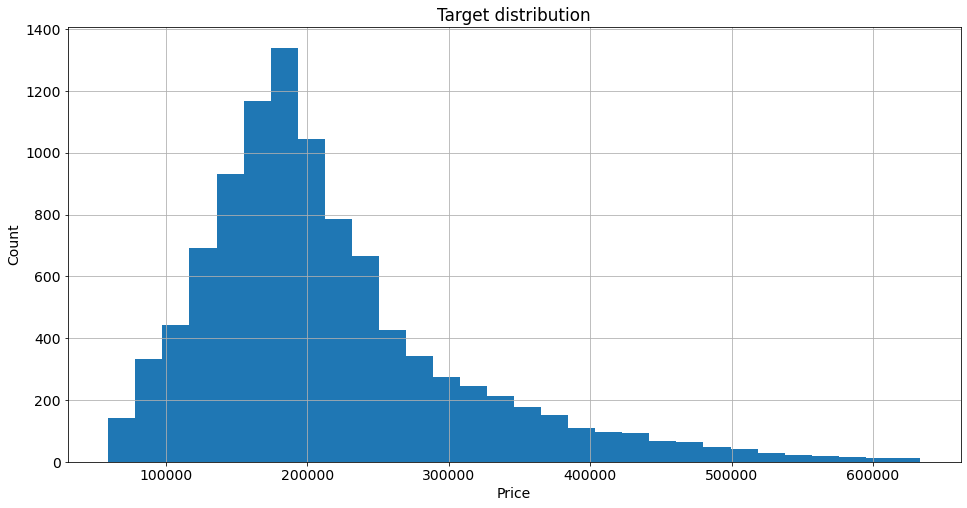

In [751]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

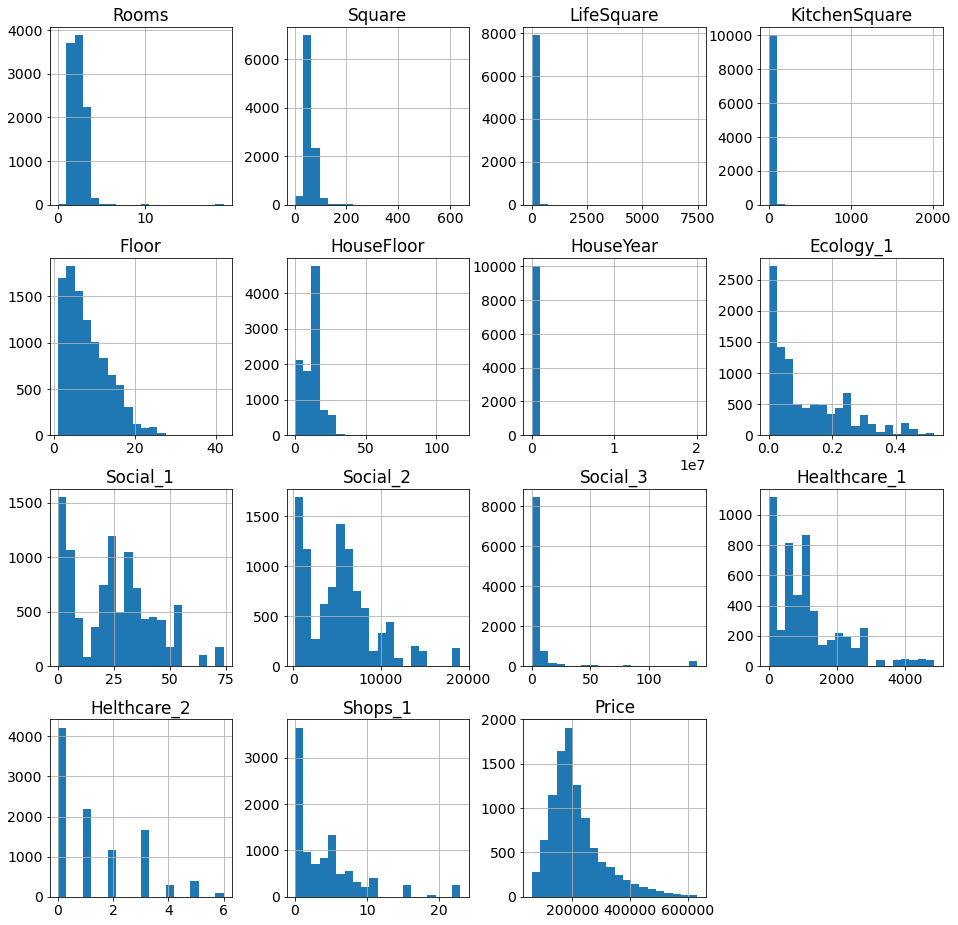

In [752]:
train_df.hist(figsize=(16, 16), bins=20, grid=True);

In [753]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [754]:
train_df.groupby(['HouseYear','DistrictId'])['HouseYear'].count()

HouseYear  DistrictId
1910       161           1
1912       161           1
           183           1
1914       172           1
1916       183           1
                        ..
2020       59            1
           62            4
           74            1
4968       147           1
20052011   109           1
Name: HouseYear, Length: 3154, dtype: int64

**Количественные переменные**

In [755]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [756]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)
train_df['Rooms'] = train_df['Rooms'].astype('int64')
train_df['HouseFloor'] = train_df['HouseFloor'].astype('int64')

### 2. Обработка выбросов  <a class='anchor' id='outlier'>
В процедуре.

### 3. Обработка пропусков  <a class='anchor' id='nan'>

In [757]:
train_df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [758]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,115.027311,NaN,10.0
1,39.832524,23.169223,8.0
2,78.342215,47.671972,10.0
3,40.409907,NaN,1.0
4,64.285067,38.562517,9.0
5,62.528465,47.103833,6.0
6,33.938750,21.772930,9.0
7,50.391814,32.893256,8.0
8,46.887892,44.628132,1.0
9,79.867477,75.085125,1.0


In [759]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians=None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
    
    def transform(self, X):
        """Трансформация данных"""
        
        #Square.Убрать выбросы Square, где площадь меньше 15 и больше 300. Полагаем, ошибка в неправльной разрядности. Если Square менльше 15, то * 10.
        X.loc[X['Square'] <15 , 'Square'] = X.loc[X['Square'] <15 , 'Square']*10
        X.loc[X['Square'] > 300 , 'Square'] = X.loc[X['Square'] > 300 , 'Square']/10

        # Rooms. Находим отношение общей площати у корректно заполнненых Rooms (от 1 до 5) к количеству комнат. 
        # Это отноешние пременям  для некорректных Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
#        
#        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
#        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        train_df_1_5_rooms=X[(X['Rooms'] > 1) & (X['Rooms'] < 5)]
        train_df_1_5_rooms_square_mean=train_df_1_5_rooms['Square'].sum()/train_df_1_5_rooms['Rooms'].sum()
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = round(X.loc[X['Rooms'] == 0,'Square']/train_df_1_5_rooms_square_mean).astype('int64')
        X.loc[train_df['Rooms'] >=6, 'Rooms'] = round(X.loc[train_df['Rooms'] >=6,'Square']/train_df_1_5_rooms_square_mean).astype('int64')
    
    
        # KitchenSquare. Находим отношение общей площати у корректно заполнненых KitchenSquare (от 3 до 20) к общему KitchenSquare. 
        # Это отноешние пременям  для некорректных KitchenSquare
        condition = (X['KitchenSquare'].isna()) \
                    | (X['KitchenSquare'] > self.kitchen_square_quantile)
       
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3


#        X['KitchenSquare_outlier'] = 0
#        X.loc[(X['KitchenSquare'] <= 3) | (X['KitchenSquare'] > 20), 'KitchenSquare_outlier'] = 1
#        train_df_KitchenSquare=X[(X['KitchenSquare'] > 3) & (X['KitchenSquare'] < 20)]
#        train_df_KitchenSquare_mean=train_df_KitchenSquare['KitchenSquare'].sum()/train_df_KitchenSquare['Square'].sum()
#        train_df_KitchenSquare_mean
#        X.loc[X['KitchenSquare'] <= 3, 'KitchenSquare'] = X.loc[X['KitchenSquare'] <= 3,'Square']*train_df_KitchenSquare_mean
#        X.loc[X['KitchenSquare'] > 20, 'KitchenSquare'] = X.loc[X['KitchenSquare'] > 20,'Square']*train_df_KitchenSquare_mean
        
        
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        X.loc[X['HouseFloor'] > 50, 'HouseFloor'] = self.medians['HouseFloor']

        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        # HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        
        # Healthcare_1
        train_Healthcare_1= X.loc[(X['Healthcare_1'].notna()),['DistrictId','Healthcare_1']]
        train_Healthcare_1_median = train_Healthcare_1.groupby('DistrictId', as_index=False).agg({'Healthcare_1':'median'}).rename(columns={'Healthcare_1':'Healthcare_1_median'})
        X=X.merge(train_Healthcare_1_median, how = 'left', left_on='DistrictId', right_on='DistrictId')
        X.loc[X['Healthcare_1'].isna(),'Healthcare_1'] = X.loc[X['Healthcare_1'].isna(),'Healthcare_1_median']
        
        Healthcare_1_mean_df=X[X['Healthcare_1'].notna()]
        Healthcare_1_mean=Healthcare_1_mean_df['Healthcare_1'].mean()
        X.loc[X['Healthcare_1'].isna(),'Healthcare_1'] = round(Healthcare_1_mean)
        X=X.drop('Healthcare_1_median',axis = 1)

            
        # LifeSquare (Найдем отношение Square к LifeSquare для тех у кого заполнено LifeSquare < 100 и площать кухни более 3.)
        X['LifeSquare_nan'] = 0
        X.loc[(X['LifeSquare'].isna()) | (X['LifeSquare']>=100), 'LifeSquare_nan'] = 1   
        X_LifeSquare=X[(X['LifeSquare'].notna()) & (X['KitchenSquare']>3) & (X['LifeSquare']<100)]
        X_LifeSquare_per=X_LifeSquare['LifeSquare'].sum()/X_LifeSquare['Square'].sum()
        X.loc[(X['LifeSquare'].isna()), 'LifeSquare'] = X.loc[(X['LifeSquare'].isna()),'Square']*X_LifeSquare_per
        X.loc[(X['LifeSquare']>=100), 'LifeSquare'] = X.loc[(X['LifeSquare']>=100),'Square']*X_LifeSquare_per

        
        X.fillna(self.medians, inplace=True)
        
        return X

### 4. Построение новых признаков  <a class='anchor' id='feature'>

In [760]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
#        self.med_price_by_district = None Очень большой вес
        self.med_price_by_floor_year = None
#        self.med_price_by_hourse_year = None
        self.med_price_by_Ecology_1=None
        self.house_year_max = None
        self.floor_max = None
        self.district_size = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        # Target encoding
        ## District, Rooms
        df = X.copy()
        
#        if y is not None:
#            df['Price'] = y.values
#            
#            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
#                                            .rename(columns={'Price':'MedPriceByDistrict'})
#            
#            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.house_year_max = df['HouseYear'].max()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
     
        ## houseyear, price#
#        if y is not None:
#            df['Price'] = y.values
#            
#            self.med_price_by_hourse_year = df.groupby(['DistrictId', 'HouseYear'], as_index=False).agg({'Price':'median'})\
#                                            .rename(columns={'Price':'med_price_by_hourse_year'})
#            
#            self.med_price_by_hourse_year_median = self.med_price_by_hourse_year['med_price_by_hourse_year'].median()        


        ## Ecology_1, price#
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_Ecology_1 = df.groupby(['DistrictId', 'Ecology_1'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'med_price_by_Ecology_1'})
            
            self.med_price_by_Ecology_1_median = self.med_price_by_Ecology_1['med_price_by_Ecology_1'].median()        

        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat
        
        # Target encoding
#        if self.med_price_by_district is not None:
#            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
#            X.fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X.fillna(self.med_price_by_floor_year_median, inplace=True)
            
        if self.med_price_by_Ecology_1 is not None:
            X = X.merge(self.med_price_by_Ecology_1, on=['DistrictId', 'Ecology_1'], how='left')
            X.fillna(self.med_price_by_Ecology_1_median, inplace=True)
            
        
        return X
    
    def floor_to_cat(self, X):
        bins = [0, 3, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)

        X['floor_cat'].fillna(-1, inplace=True) 
        return X
     
    def year_to_cat(self, X):
        bins = [0, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X
            
    

### 5. Отбор признаков  <a class='anchor' id='feature_selection'>

In [761]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [762]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['Rooms_outlier', 'HouseFloor_outlier', 'HouseYear_outlier', 'LifeSquare_nan', 'DistrictSize',
                     'new_district', 'IsDistrictLarge', 'MedPriceByFloorYear','med_price_by_Ecology_1']

#'MedPriceByDistrict',

target_name = 'Price'

### 6. Разбиение на train и test  <a class='anchor' id='split'>

In [763]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

X = train_df.drop(columns=target_name)
y = train_df[target_name]

In [764]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [765]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 23), (3300, 23), (5000, 23))

In [766]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 30), (3300, 30), (5000, 30))

In [767]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
test_df = test_df[feature_names + new_feature_names]

In [768]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

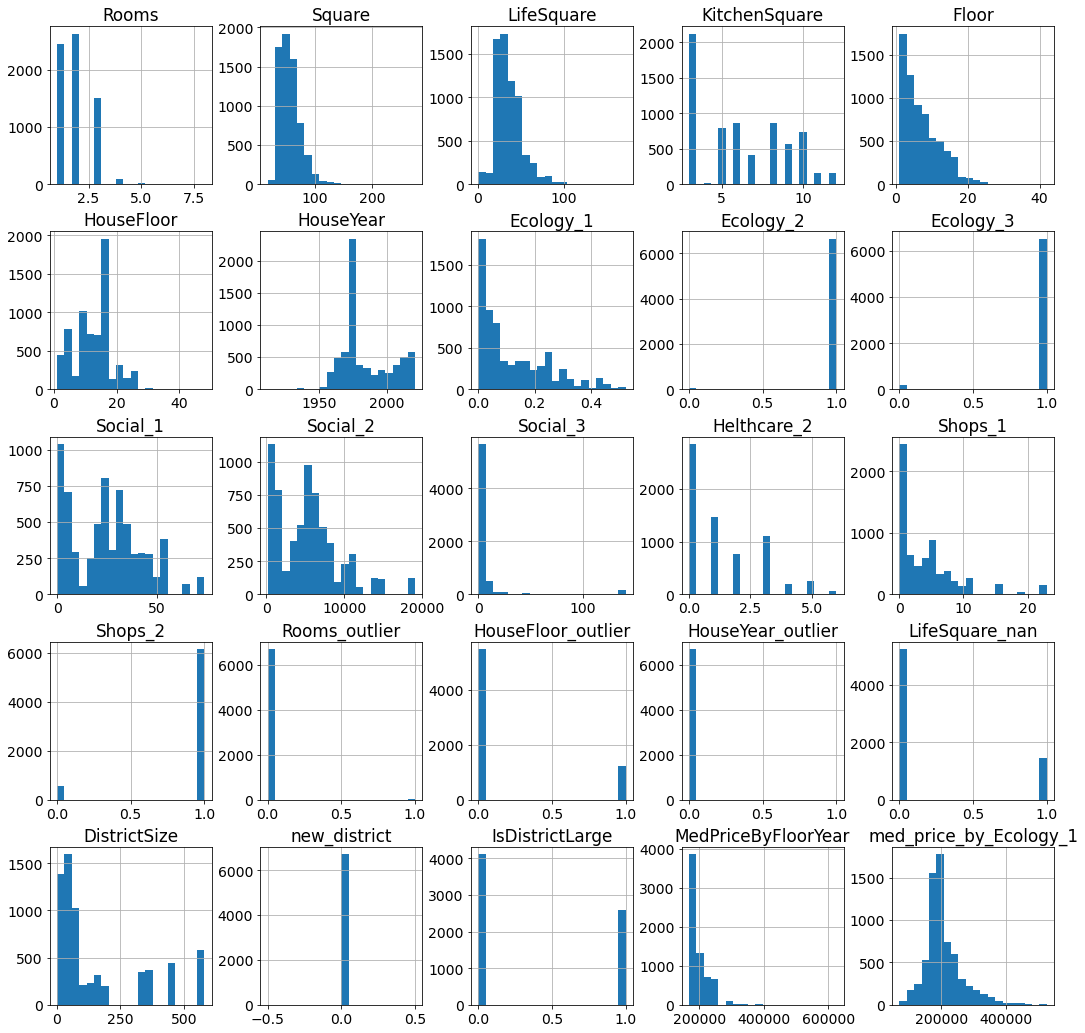

In [769]:
X_train.hist(figsize=(18, 18), bins=20, grid=True);

**Стандартизация признаков** 

In [770]:
# Дала результат хуже.
#feature_names_for_stand = ['Square',
# 'LifeSquare',
# 'KitchenSquare',
# 'Ecology_1',
# 'MedPriceByDistrict',
# 'MedPriceByFloorYear',
# 'med_price_by_Ecology_1',
# 'Ecology_1']

In [771]:
#scaler = StandardScaler()

#stand_features_train = scaler.fit_transform(X_train[feature_names_for_stand])
#stand_features_test = scaler.transform(X_valid[feature_names_for_stand])
#stand_features_real_test = scaler.transform(test_df[feature_names_for_stand])

In [772]:
#stand_features_train

In [773]:
#X_train[feature_names_for_stand] = stand_features_train
#X_valid[feature_names_for_stand] = stand_features_test

### 7. Построение модели  <a class='anchor' id='modeling'>

**Обучение**

In [774]:
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=10, # глубина дерева  
                                 min_samples_leaf=10, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42, 
                                 n_estimators=10  # кол-во деревьев
                                 )
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=10, n_estimators=10,
                      random_state=42)

**Оценка модели**

Train R2:	0.817
Test R2:	0.722


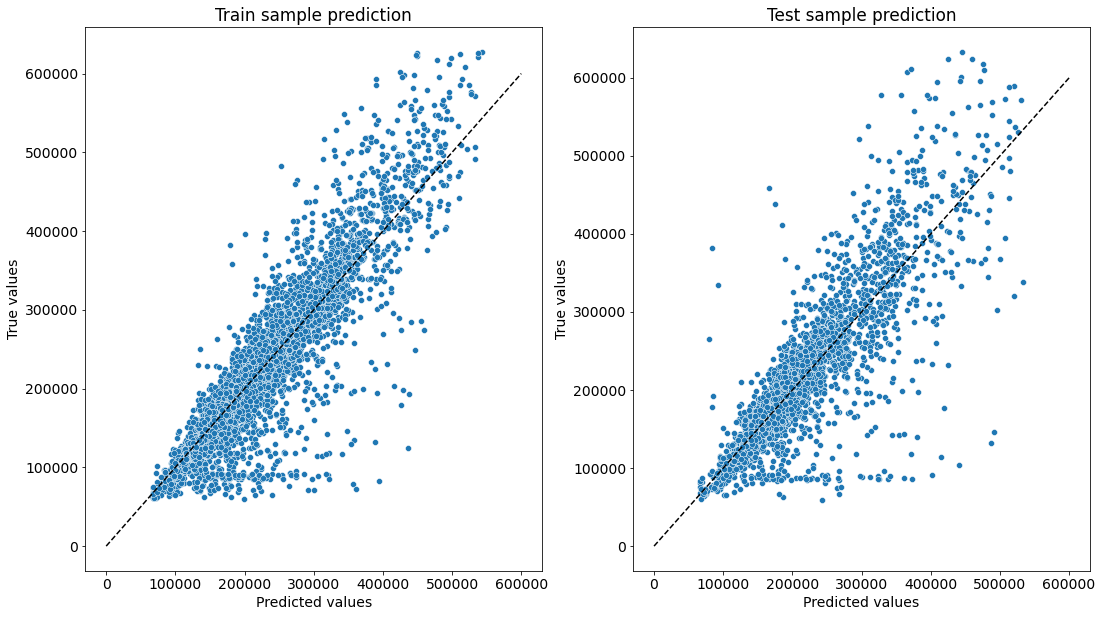

In [775]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

**DecisionTreeRegressor**

Train R2:	0.865
Test R2:	0.722


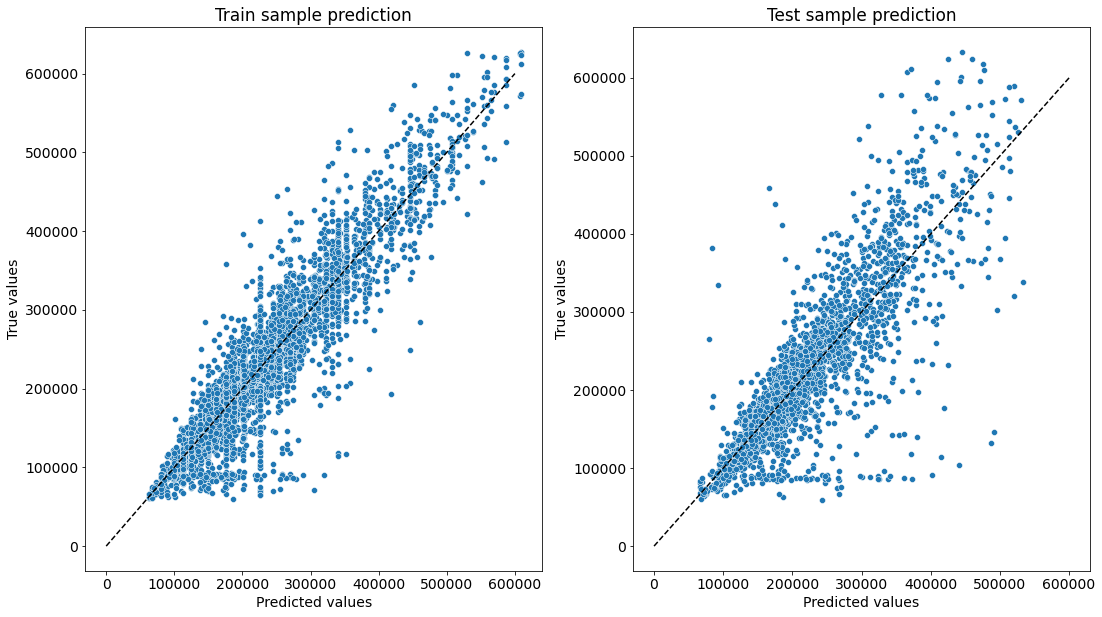

In [776]:
dt_model = DecisionTreeRegressor(criterion='mse', 
                                 max_depth=10, # глубина дерева  
                                 min_samples_leaf=3, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42)
dt_model.fit(X_train, y_train)

y_train_preds = dt_model.predict(X_train)
evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

**GradientBoostingRegressor**

Train R2:	0.907
Test R2:	0.722


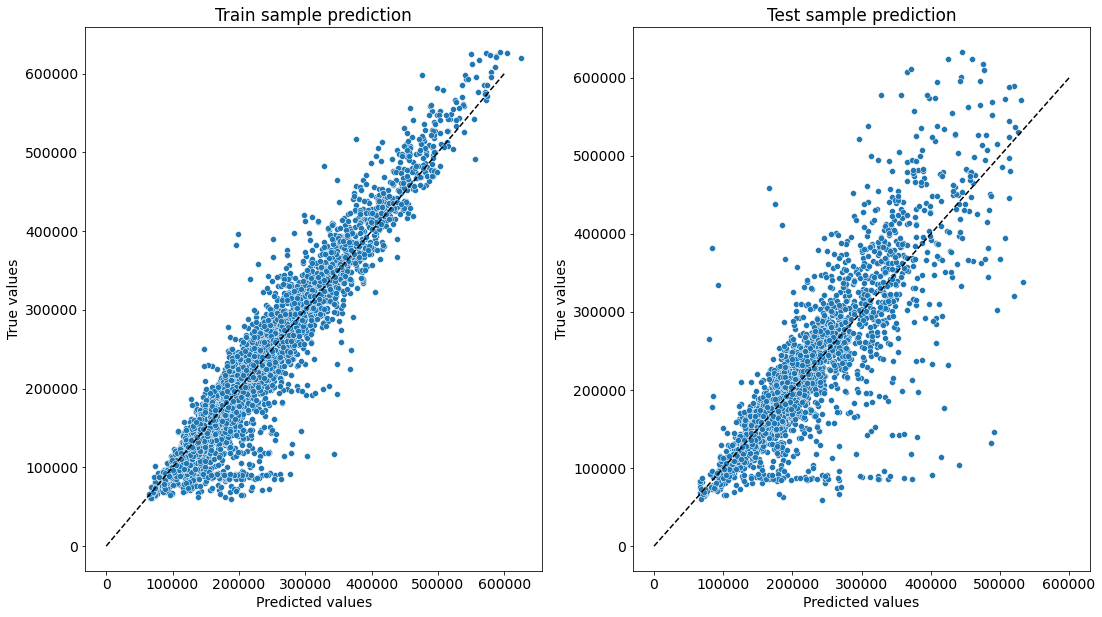

In [777]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=7,
                                     min_samples_leaf=10,
                                     random_state=42,  
                                     n_estimators=100)
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

**Кросс-валидация**

In [778]:
cv_score = cross_val_score(gb_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.7599919 , 0.71695744, 0.74878953])

In [779]:
cv_score.mean()

0.7419129569435086

**Важность признаков**

In [780]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,0.464737
24,med_price_by_Ecology_1,0.389417
0,Rooms,0.028356
23,MedPriceByFloorYear,0.018498
12,Social_3,0.017517
20,DistrictSize,0.013713
2,LifeSquare,0.011116
10,Social_1,0.010525
11,Social_2,0.008821
6,HouseYear,0.008431


In [781]:
X_train.columns

Index(['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1',
       'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2',
       'Rooms_outlier', 'HouseFloor_outlier', 'HouseYear_outlier',
       'LifeSquare_nan', 'DistrictSize', 'new_district', 'IsDistrictLarge',
       'MedPriceByFloorYear', 'med_price_by_Ecology_1'],
      dtype='object')

Идея более сложных моделей:

In [782]:
from sklearn.ensemble import StackingRegressor, VotingRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
gb = GradientBoostingRegressor()
stack = StackingRegressor([('lr', lr), ('rf', rf_model)], final_estimator=gb)
stack.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(max_depth=10,
                                                     min_samples_leaf=10,
                                                     n_estimators=10,
                                                     random_state=42))],
                  final_estimator=GradientBoostingRegressor())

Train R2:	0.797
Test R2:	0.706


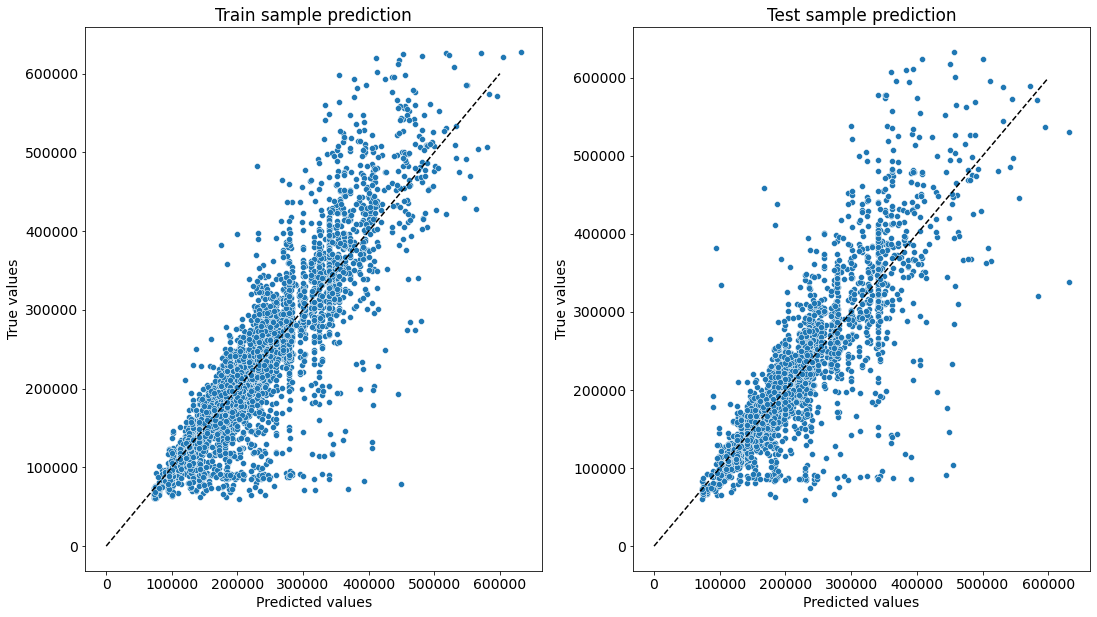

In [783]:
y_train_preds = stack.predict(X_train)
y_test_preds = stack.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

### 8. Прогнозирование на тестовом датасете  <a class='anchor' id='prediction'>

1. Выполнить для тестового датасета те же этапы обработки и постронияния признаков
2. Не потерять и не перемешать индексы от примеров при построении прогнозов
3. Прогнозы должны быть для все примеров из тестового датасета (для всех строк)

In [784]:
test_df.shape

(5000, 25)

In [785]:
test_df.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Shops_2,Rooms_outlier,HouseFloor_outlier,HouseYear_outlier,LifeSquare_nan,DistrictSize,new_district,IsDistrictLarge,MedPriceByFloorYear,med_price_by_Ecology_1
0,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,1,...,1,0,0,0,0,76.0,0,0,188059.595076,202526.486861
1,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,1,1,...,0,0,0,0,0,164.0,0,1,175233.891957,157190.771131
2,2.0,59.463678,37.372425,9.0,19,19.0,1977,0.211401,1,1,...,1,0,0,0,1,580.0,0,1,173028.982008,119817.448457
3,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,1,1,...,1,0,0,0,0,372.0,0,1,181626.175103,111207.565421
4,1.0,53.837056,33.836139,3.0,8,17.0,1977,0.309479,1,1,...,1,0,0,0,1,65.0,0,0,192572.220319,156028.369596


In [786]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [787]:
predictions = gb_model.predict(test_df)
predictions

array([162893.94848252, 125325.22756953, 139479.43234394, ...,
       149664.29387363, 200912.85469612, 238126.43396021])

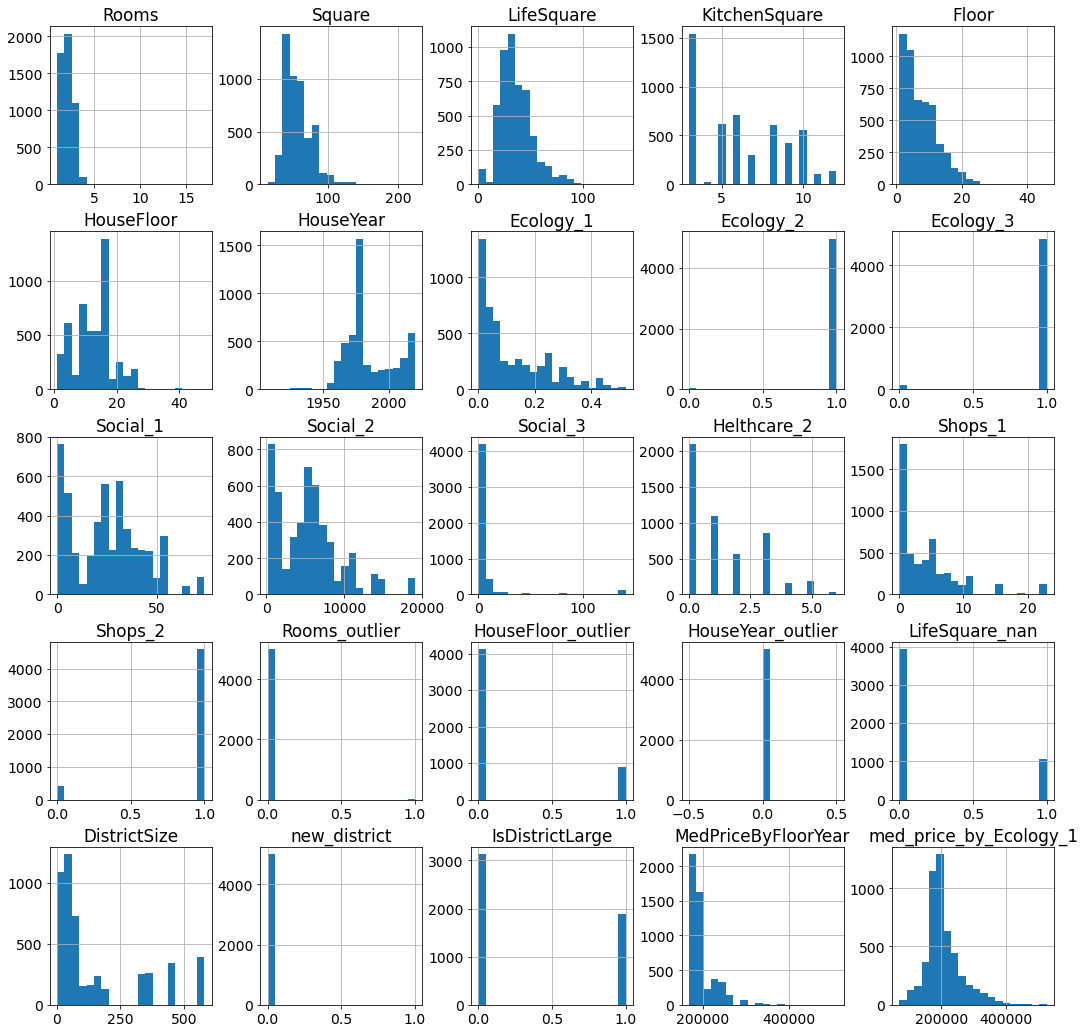

In [788]:
test_df.hist(figsize=(18, 18), bins=20, grid=True);

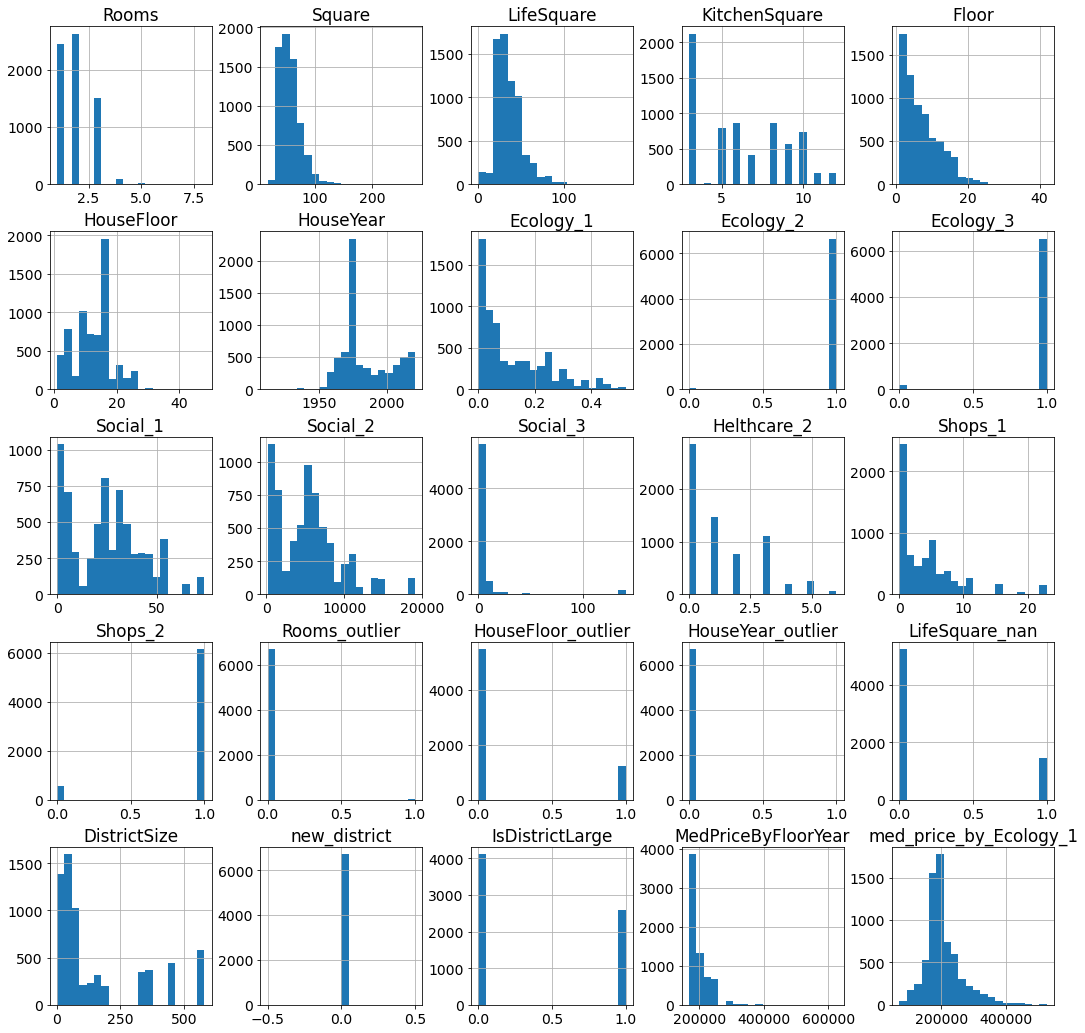

In [789]:
X_train.hist(figsize=(18, 18), bins=20, grid=True);

In [790]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,162893.948483
1,5925,125325.227570
2,960,139479.432344
3,3848,104327.224966
4,746,151158.585380


In [791]:
submit.to_csv('gb_model.csv', index=False)